# Tourist satisfaction with transport systems to Mount Etna, Sicily. Part 2. Classification.

# This cell will prompt you to connect this notebook with your google account.
from google.colab import drive                                                                        
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Academy/+ Papers/en_proceso/mount_etna/'


In [1]:
base_dir = '../' # To run locally

# 1. Data pre-processing

In [2]:
#!pip install pycaret[full]

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import spacy
import imblearn
import matplotlib.font_manager
#spacy.load("en_core_web_sm")

#ignore log(0) and divide by 0 warning
np.seterr(divide = 'ignore');
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

print('Libraries read!')

Libraries read!


## Reading data

In [4]:
lda_title_data_tuned = pd.read_csv(base_dir + 'data/lda_title_data_tuned.csv')
lda_review_data_tuned = pd.read_csv(base_dir + 'data/lda_review_data_tuned.csv')

# 5. Classification model

### Merging data

In [5]:
lda_title_data_tuned.head(15)

,Title_title,Title_sentiment_rating,Title_Topic_0,Title_Topic_1,Title_Dominant_Topic,Title_Perc_Dominant_Topic
0,hard,0,0.254485,0.745515,Topic_1,0.75
1,must see active volcano least life,0,0.925414,0.074586,Topic_0,0.93
2,cost cable car top,0,0.100465,0.899535,Topic_1,0.90
3,orgainise easy access,0,0.303635,0.696365,Topic_1,0.70
4,cheap easy way,0,0.618922,0.381078,Topic_0,0.62
5,question cable car child,0,0.102493,0.897507,Topic_1,0.90
6,cable car,0,0.167152,0.832848,Topic_1,0.83
7,NaN,0,0.500000,0.500000,Topic_0,0.50
8,NaN,0,0.500000,0.500000,Topic_0,0.50
9,watch cloud,0,0.489822,0.510178,Topic_1,0.51


In [6]:
lda_review_data_tuned.head(15)

,Review_content,Review_sentiment_rating,Review_Topic_0,Review_Topic_1,Review_Dominant_Topic,Review_Perc_Dominant_Topic
0,arrive make_sure allow plenty road long think ...,0,0.266878,0.733122,Topic_1,0.73
1,extraordinary active beautiful landscape ever ...,0,0.978228,0.021772,Topic_0,0.98
2,charge look receipt entry blog say cost say po...,0,0.058875,0.941125,Topic_1,0.94
3,small child august use company sight however o...,0,0.017836,0.982164,Topic_1,0.98
4,able spend money research plenty euro leave re...,0,0.058290,0.941710,Topic_1,0.94
5,month old know child young buggy thank,0,0.910822,0.089178,Topic_0,0.91
6,follow unheard deduction price ast convenient ...,0,0.981205,0.018795,Topic_0,0.98
7,etna adult child age feel spend money lift jee...,0,0.694122,0.305878,Topic_0,0.69
8,stay half hour parking place choose early_morn...,0,0.321960,0.678040,Topic_1,0.68
9,course must warn private totally shroud cloud ...,0,0.899300,0.100700,Topic_0,0.90


In [7]:
data = pd.concat([lda_title_data_tuned.drop(columns=['Title_sentiment_rating'], axis=1), lda_review_data_tuned], axis=1)
data = data.rename(columns={'Review_sentiment_rating': 'sentiment_rating'})
data = data.dropna(subset=['Title_title' ,'Review_content']).reset_index(drop=True)
data.head(15)

,Title_title,Title_Topic_0,Title_Topic_1,Title_Dominant_Topic,Title_Perc_Dominant_Topic,Review_content,sentiment_rating,Review_Topic_0,Review_Topic_1,Review_Dominant_Topic,Review_Perc_Dominant_Topic
0,hard,0.254485,0.745515,Topic_1,0.75,arrive make_sure allow plenty road long think ...,0,0.266878,0.733122,Topic_1,0.73
1,must see active volcano least life,0.925414,0.074586,Topic_0,0.93,extraordinary active beautiful landscape ever ...,0,0.978228,0.021772,Topic_0,0.98
2,cost cable car top,0.100465,0.899535,Topic_1,0.90,charge look receipt entry blog say cost say po...,0,0.058875,0.941125,Topic_1,0.94
3,orgainise easy access,0.303635,0.696365,Topic_1,0.70,small child august use company sight however o...,0,0.017836,0.982164,Topic_1,0.98
4,cheap easy way,0.618922,0.381078,Topic_0,0.62,able spend money research plenty euro leave re...,0,0.058290,0.941710,Topic_1,0.94
5,question cable car child,0.102493,0.897507,Topic_1,0.90,month old know child young buggy thank,0,0.910822,0.089178,Topic_0,0.91
6,cable car,0.167152,0.832848,Topic_1,0.83,follow unheard deduction price ast convenient ...,0,0.981205,0.018795,Topic_0,0.98
7,watch cloud,0.489822,0.510178,Topic_1,0.51,course must warn private totally shroud cloud ...,0,0.899300,0.100700,Topic_0,0.90
8,earre rule take coat,0.104026,0.895974,Topic_1,0.90,beloved chat various thing evening mention ups...,0,0.931772,0.068228,Topic_0,0.93
9,tour cheap good,0.126009,0.873991,Topic_1,0.87,least different company alone end plump cheap ...,0,0.913280,0.086720,Topic_0,0.91


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title_title                 1624 non-null   object 
 1   Title_Topic_0               1624 non-null   float64
 2   Title_Topic_1               1624 non-null   float64
 3   Title_Dominant_Topic        1624 non-null   object 
 4   Title_Perc_Dominant_Topic   1624 non-null   float64
 5   Review_content              1624 non-null   object 
 6   sentiment_rating            1624 non-null   int64  
 7   Review_Topic_0              1624 non-null   float64
 8   Review_Topic_1              1624 non-null   float64
 9   Review_Dominant_Topic       1624 non-null   object 
 10  Review_Perc_Dominant_Topic  1624 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 139.7+ KB


In [115]:
data['sentiment_rating'].value_counts(normalize=True)

0    0.893473
1    0.106527
Name: sentiment_rating, dtype: float64

In [9]:
from pycaret.classification import *

without_pca = setup(data = data, 
            target = 'sentiment_rating',
            session_id = 42,
            normalize = True,
            #normalize_method = 'minmax',
            transformation = True,
            #pca = True,
            ignore_features=['Title_title', 'Review_content', 'Title_Dominant_Topic', 'Title_Perc_Dominant_Topic', 
                             'Review_Dominant_Topic', 'Review_Perc_Dominant_Topic'],
            use_gpu = True,
            fix_imbalance=True,
            fix_imbalance_method=imblearn.over_sampling.SVMSMOTE(),
            data_split_stratify = True,
            fold_strategy = 'stratifiedkfold',
            silent = True,
            log_experiment = True,
            experiment_name = 'No pca, oversampling with SVMSMOTE'
           )

,Description,Value
0,session_id,42
1,Target,sentiment_rating
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1624, 11)"
5,Missing Values,0
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


eda(display_format = 'bokeh')

In [10]:
best_models = compare_models(turbo=False, exclude=['gpc', 'mlp', 'svm', 'ridge'], sort='recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7641,0.5406,0.2564,0.1542,0.1895,0.0649,0.0676,0.0180
ada,Ada Boost Classifier,0.8054,0.5608,0.2058,0.1555,0.1659,0.0660,0.0691,0.0910
knn,K Neighbors Classifier,0.7543,0.5019,0.1981,0.1232,0.1510,0.0201,0.0191,0.1810
lightgbm,Light Gradient Boosting Machine,0.7869,0.5791,0.1814,0.1412,0.1565,0.0396,0.0397,0.1070
gbc,Gradient Boosting Classifier,0.7949,0.5881,0.1404,0.1055,0.1180,0.0067,0.0069,0.1180
rf,Random Forest Classifier,0.7843,0.5632,0.1231,0.0969,0.1074,-0.0113,-0.0121,0.3460
et,Extra Trees Classifier,0.7826,0.5572,0.1231,0.0986,0.1085,-0.0111,-0.0122,0.3820
rbfsvm,SVM - Radial Kernel,0.8574,0.4961,0.0487,0.0589,0.0504,0.0052,0.0045,0.1890
nb,Naive Bayes,0.8759,0.5597,0.0244,0.1083,0.0394,0.0125,0.0204,0.0170
lda,Linear Discriminant Analysis,0.8812,0.5550,0.0244,0.1167,0.0401,0.0180,0.0290,0.0180


In [108]:
!mlflow ui

[2022-02-12 12:33:00 +0100] [3845] [INFO] Starting gunicorn 20.1.0
[2022-02-12 12:33:00 +0100] [3845] [INFO] Listening at: http://127.0.0.1:5000 (3845)
[2022-02-12 12:33:00 +0100] [3845] [INFO] Using worker: sync
[2022-02-12 12:33:00 +0100] [3847] [INFO] Booting worker with pid: 3847
^C
[2022-02-12 12:35:53 +0100] [3845] [INFO] Handling signal: int
[2022-02-12 12:35:53 +0100] [3847] [INFO] Worker exiting (pid: 3847)


## Decision Tree

In [11]:
# Best ML analysis
dt = create_model(estimator = 'dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7544,0.5319,0.2500,0.1364,0.1765,0.0466,0.0496
1,0.7632,0.5735,0.3333,0.1739,0.2286,0.1047,0.1125
2,0.7632,0.4632,0.0833,0.0588,0.0690,-0.0621,-0.0633
3,0.7719,0.5417,0.2500,0.1500,0.1875,0.0644,0.0672
4,0.7018,0.5025,0.2500,0.1071,0.1500,0.0031,0.0035
5,0.8158,0.5609,0.2308,0.2143,0.2222,0.1179,0.1180
6,0.7080,0.5062,0.2500,0.1111,0.1538,0.0080,0.0089
7,0.7257,0.4794,0.1667,0.0870,0.1143,-0.0294,-0.0316
8,0.8053,0.6708,0.5000,0.2727,0.3529,0.2498,0.2658
9,0.8319,0.5755,0.2500,0.2308,0.2400,0.1456,0.1458


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


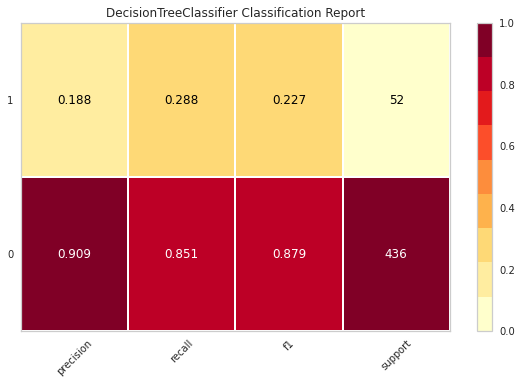

In [12]:
# Plotting the classification report
plot_model(estimator = dt, plot = 'class_report')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


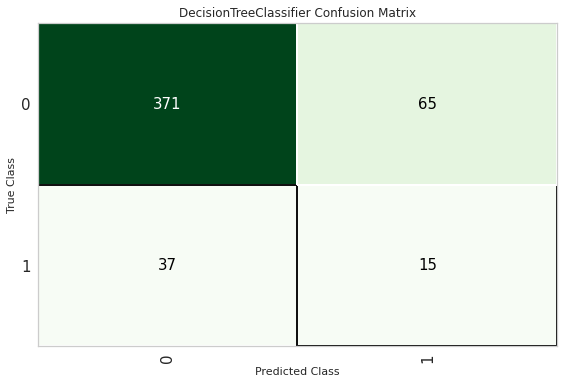

In [13]:
# Plotting the confusion matrix
plot_model(estimator = dt, plot = 'confusion_matrix')

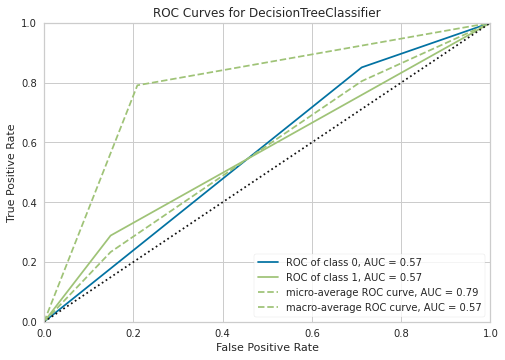

In [14]:
# Plotting the AUC
plot_model(estimator = dt, plot = 'auc')

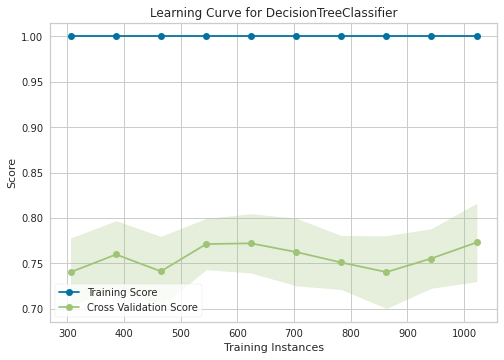

In [15]:
# Plotting the learning curve
plot_model(estimator = dt, plot = 'learning' )

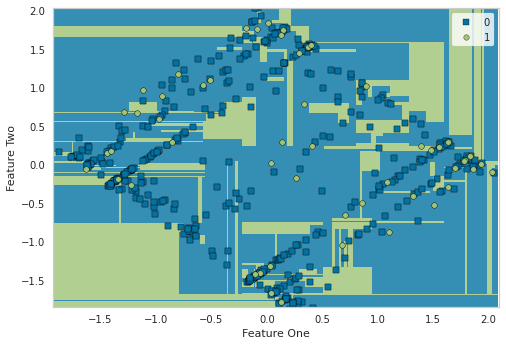

In [16]:
plot_model(estimator = dt, plot='boundary')

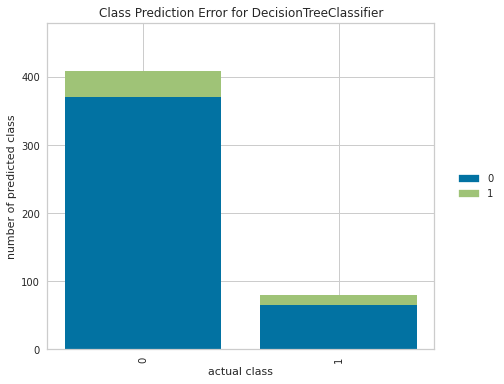

In [17]:
plot_model(estimator = dt, plot = 'error')

In [18]:
evaluate_model(estimator = dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: dt

In [19]:
# tune hyperparameters to optimize AUC
tuned_dt = tune_model(dt, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8246,0.5523,0.1667,0.1667,0.1667,0.0686,0.0686
1,0.7193,0.5944,0.4167,0.1667,0.2381,0.1032,0.1196
2,0.8421,0.6275,0.0833,0.1250,0.1000,0.0172,0.0177
3,0.7895,0.5547,0.1667,0.1250,0.1429,0.0256,0.0260
4,0.8246,0.5792,0.1667,0.1667,0.1667,0.0686,0.0686
5,0.7807,0.6813,0.1538,0.1250,0.1379,0.0138,0.0139
6,0.7168,0.4422,0.2500,0.1154,0.1579,0.0147,0.0163
7,0.7876,0.5928,0.1667,0.1250,0.1429,0.0245,0.0248
8,0.7345,0.6312,0.5000,0.2000,0.2857,0.1580,0.1831
9,0.8230,0.5998,0.0833,0.1000,0.0909,-0.0062,-0.0063


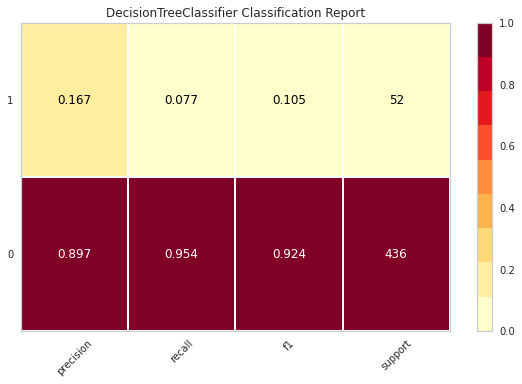

In [20]:
# Plotting the classification report
plot_model(estimator = tuned_dt, plot = 'class_report')

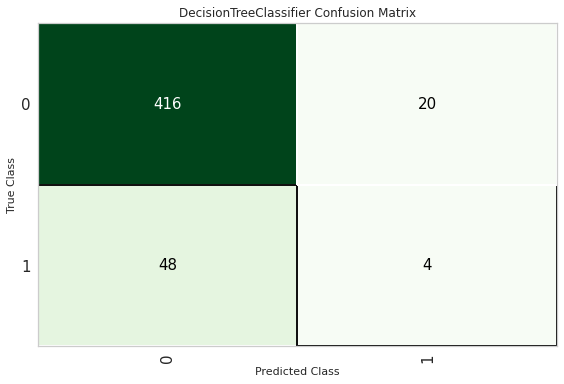

In [21]:
# Plotting the confusion matrix
plot_model(estimator = tuned_dt, plot = 'confusion_matrix')

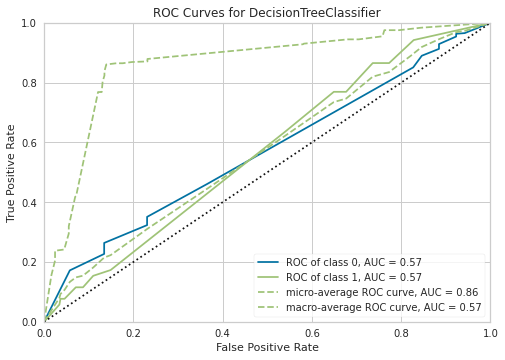

In [22]:
# Plotting the AUC
plot_model(estimator = tuned_dt, plot = 'auc')

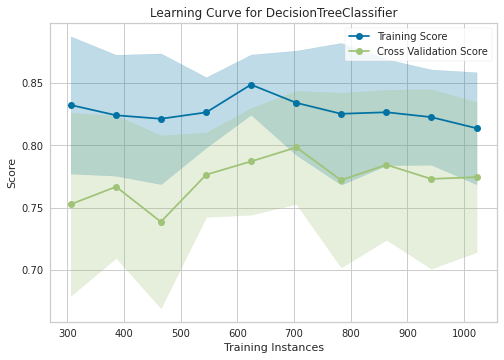

In [23]:
# Plotting the learning curve
plot_model(estimator = tuned_dt, plot = 'learning' )

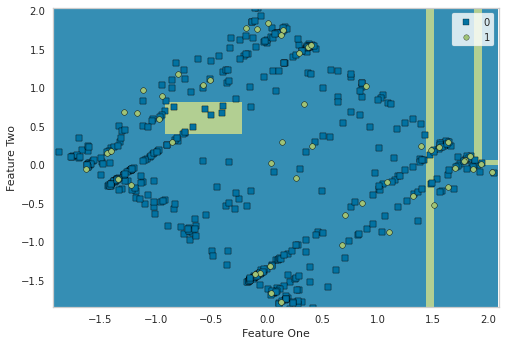

In [24]:
plot_model(estimator = tuned_dt, plot='boundary')

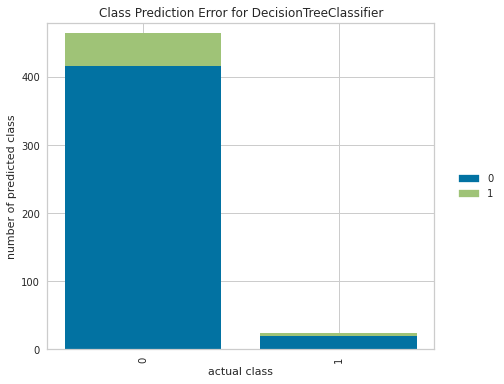

In [25]:
plot_model(estimator = tuned_dt, plot = 'error')

In [26]:
evaluate_model(estimator = tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Ada Boost Classifier

In [27]:
# Best ML analysis
ada = create_model(estimator = 'ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8596,0.5976,0.0833,0.1667,0.1111,0.0440,0.0472
1,0.8158,0.4955,0.0833,0.0909,0.0870,-0.0153,-0.0153
2,0.8596,0.4743,0.0000,0.0000,0.0000,-0.0556,-0.0654
3,0.8333,0.5217,0.2500,0.2308,0.2400,0.1466,0.1467
4,0.7193,0.5298,0.3333,0.1429,0.2000,0.0617,0.0699
5,0.7895,0.7544,0.3077,0.2105,0.2500,0.1325,0.1358
6,0.7611,0.6068,0.4167,0.2000,0.2703,0.1480,0.1623
7,0.7965,0.4571,0.2500,0.1765,0.2069,0.0941,0.0960
8,0.7522,0.6939,0.2500,0.1364,0.1765,0.0453,0.0481
9,0.8673,0.4773,0.0833,0.2000,0.1176,0.0589,0.0655


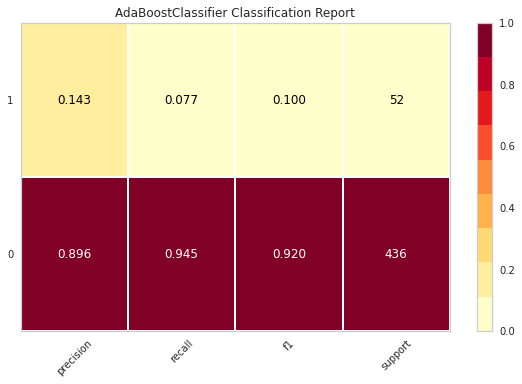

In [28]:
# Plotting the classification report
plot_model(estimator = ada, plot = 'class_report')

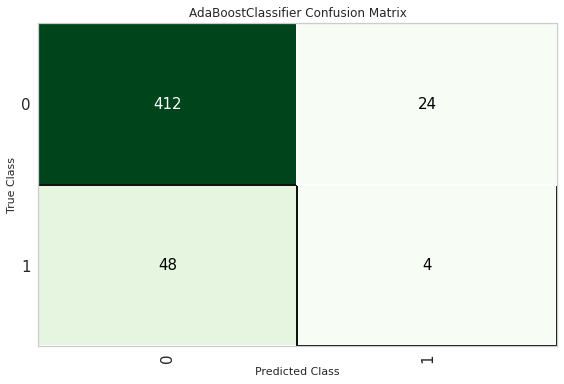

In [29]:
# Plotting the confusion matrix
plot_model(estimator = ada, plot = 'confusion_matrix')

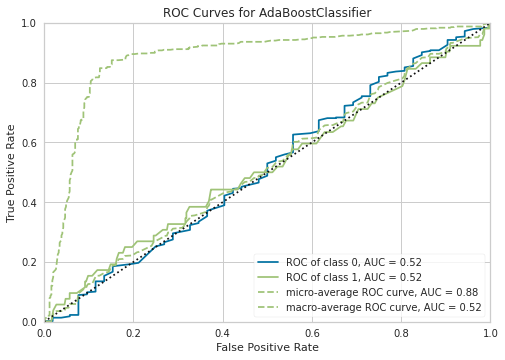

In [30]:
# Plotting the AUC
plot_model(estimator = ada, plot = 'auc')

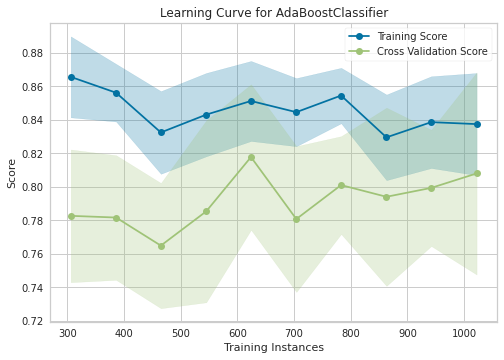

In [31]:
# Plotting the learning curve
plot_model(estimator = ada, plot = 'learning' )

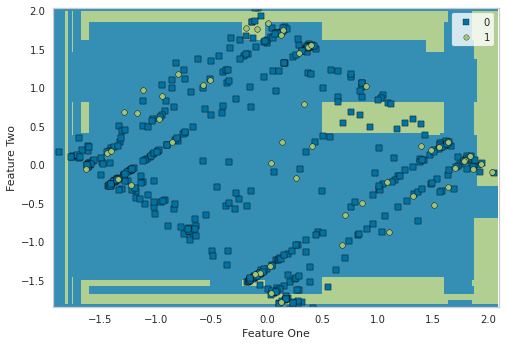

In [32]:
plot_model(estimator = ada, plot='boundary')

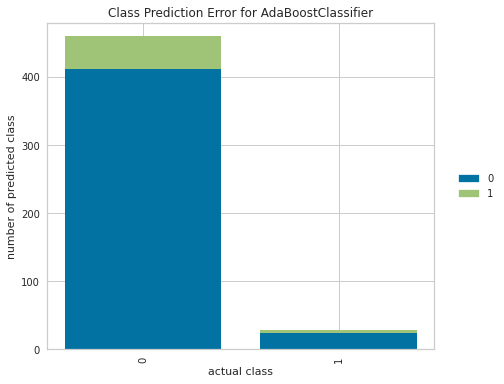

In [33]:
plot_model(estimator = ada, plot = 'error')

In [34]:
evaluate_model(estimator = ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: ada

In [35]:
# tune hyperparameters to optimize AUC
tuned_ada = tune_model(ada, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8421,0.6528,0.0000,0.0000,0.0000,-0.0755,-0.0808
1,0.7719,0.4726,0.1667,0.1111,0.1333,0.0080,0.0083
2,0.8158,0.4436,0.0000,0.0000,0.0000,-0.0992,-0.1004
3,0.8158,0.5801,0.1667,0.1538,0.1600,0.0567,0.0568
4,0.7456,0.5650,0.3333,0.1600,0.2162,0.0862,0.0945
5,0.7895,0.7814,0.4615,0.2609,0.3333,0.2196,0.2322
6,0.7257,0.5908,0.3333,0.1481,0.2051,0.0681,0.0763
7,0.8053,0.4559,0.2500,0.1875,0.2143,0.1058,0.1072
8,0.7788,0.7277,0.4167,0.2174,0.2857,0.1699,0.1825
9,0.8584,0.4414,0.0833,0.1667,0.1111,0.0434,0.0465


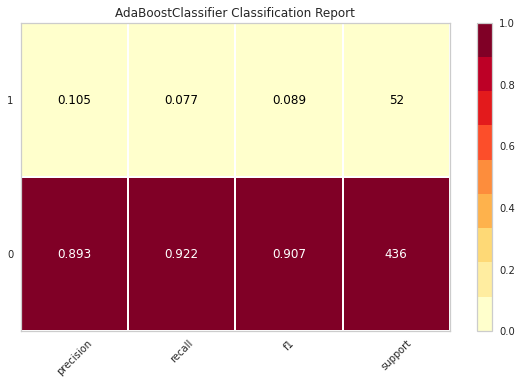

In [36]:
# Plotting the classification report
plot_model(estimator = tuned_ada, plot = 'class_report')

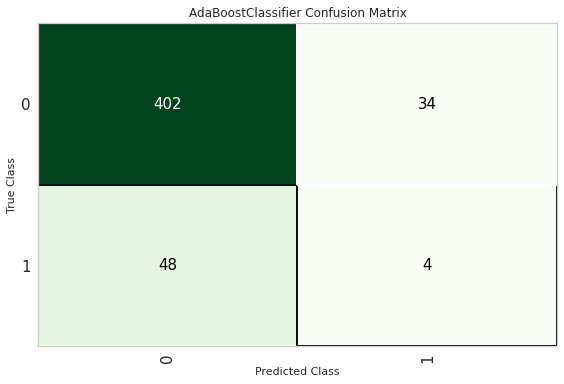

In [37]:
# Plotting the confusion matrix
plot_model(estimator = tuned_ada, plot = 'confusion_matrix')

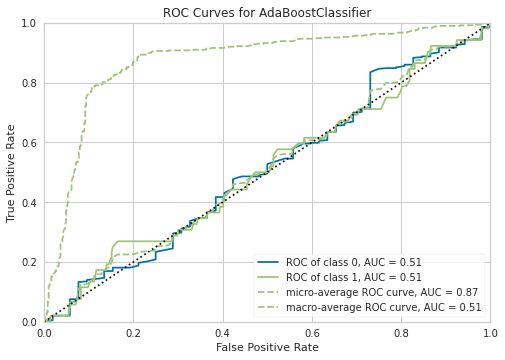

In [38]:
# Plotting the AUC
plot_model(estimator = tuned_ada, plot = 'auc')

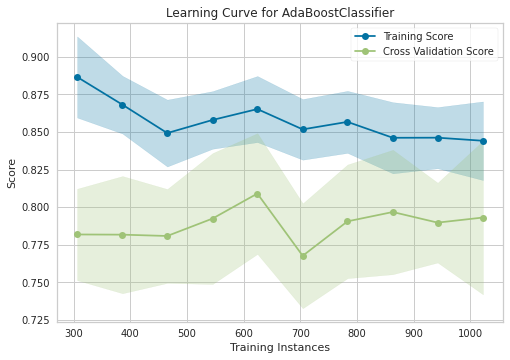

In [39]:
# Plotting the learning curve
plot_model(estimator = tuned_ada, plot = 'learning' )

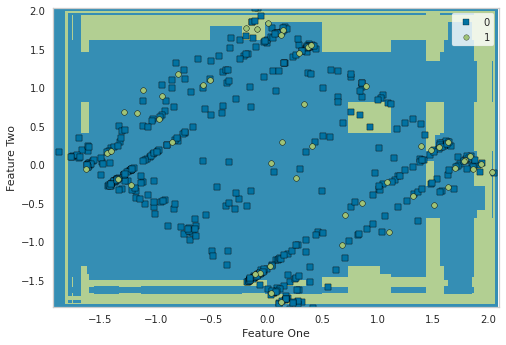

In [40]:
plot_model(estimator = tuned_ada, plot='boundary')

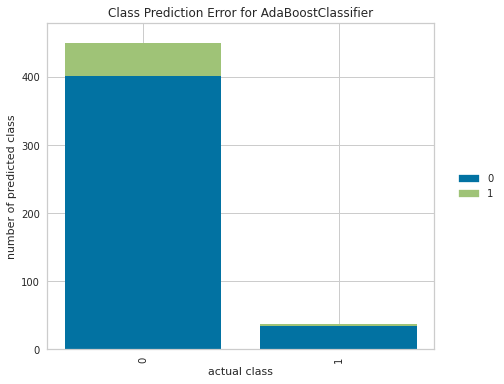

In [41]:
plot_model(estimator = tuned_ada, plot = 'error')

In [42]:
evaluate_model(estimator = tuned_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## lightgbm

In [43]:
# Best ML analysis
lightgbm = create_model(estimator = 'lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7982,0.5568,0.1667,0.1333,0.1481,0.0353,0.0356
1,0.7281,0.5678,0.1667,0.0870,0.1143,-0.0279,-0.0300
2,0.8421,0.5000,0.1667,0.2000,0.1818,0.0952,0.0957
3,0.7982,0.5899,0.1667,0.1333,0.1481,0.0353,0.0356
4,0.7719,0.5719,0.2500,0.1500,0.1875,0.0644,0.0672
5,0.8246,0.7030,0.2308,0.2308,0.2308,0.1318,0.1318
6,0.7788,0.5582,0.1667,0.1176,0.1379,0.0153,0.0156
7,0.7345,0.5545,0.0833,0.0500,0.0625,-0.0810,-0.0846
8,0.7876,0.6947,0.2500,0.1667,0.2000,0.0832,0.0854
9,0.8053,0.4942,0.1667,0.1429,0.1538,0.0446,0.0448


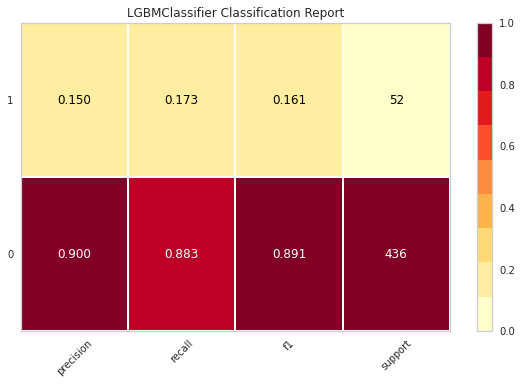

In [44]:
# Plotting the classification report
plot_model(estimator = lightgbm, plot = 'class_report')

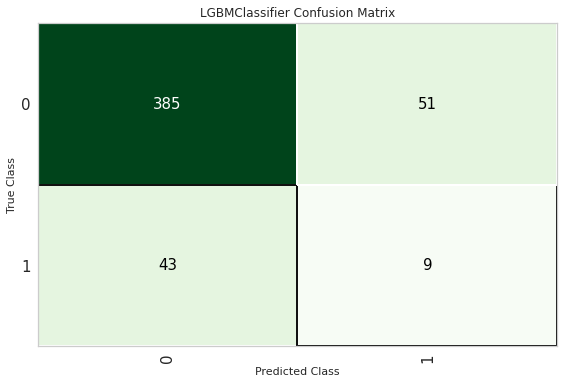

In [45]:
# Plotting the confusion matrix
plot_model(estimator = lightgbm, plot = 'confusion_matrix')

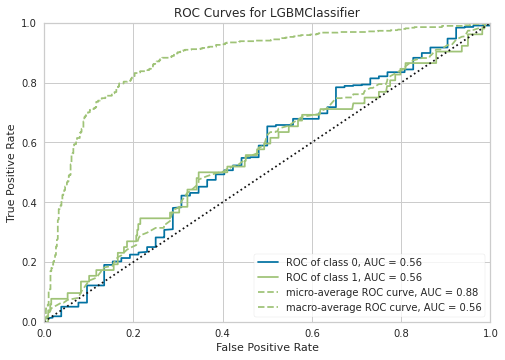

In [46]:
# Plotting the AUC
plot_model(estimator = lightgbm, plot = 'auc')

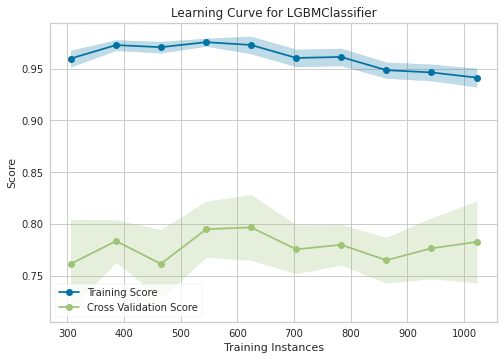

In [47]:
# Plotting the learning curve
plot_model(estimator = lightgbm, plot = 'learning' )

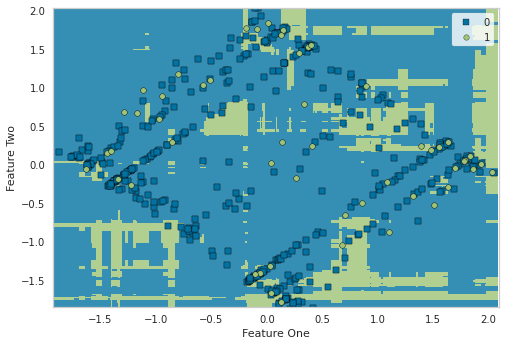

In [ ]:
plot_model(estimator = lightgbm, plot='boundary')

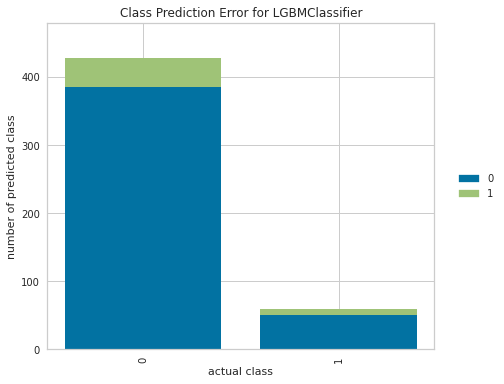

In [ ]:
plot_model(estimator = lightgbm, plot = 'error')

In [ ]:
evaluate_model(estimator = lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: lightgbm

In [51]:
# tune hyperparameters to optimize AUC
tuned_lightgbm = tune_model(lightgbm, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7456,0.5551,0.3333,0.1600,0.2162,0.0862,0.0945
1,0.6667,0.5212,0.1667,0.0667,0.0952,-0.0649,-0.0752
2,0.7719,0.6691,0.2500,0.1500,0.1875,0.0644,0.0672
3,0.7544,0.5940,0.4167,0.1923,0.2632,0.1392,0.1542
4,0.7018,0.5997,0.4167,0.1562,0.2273,0.0876,0.1038
5,0.7895,0.7814,0.6923,0.3103,0.4286,0.3218,0.3607
6,0.7522,0.5941,0.3333,0.1667,0.2222,0.0939,0.1019
7,0.7611,0.6733,0.5833,0.2414,0.3415,0.2250,0.2578
8,0.6991,0.7054,0.2500,0.1071,0.1500,0.0016,0.0018
9,0.7168,0.6213,0.0833,0.0455,0.0588,-0.0911,-0.0969


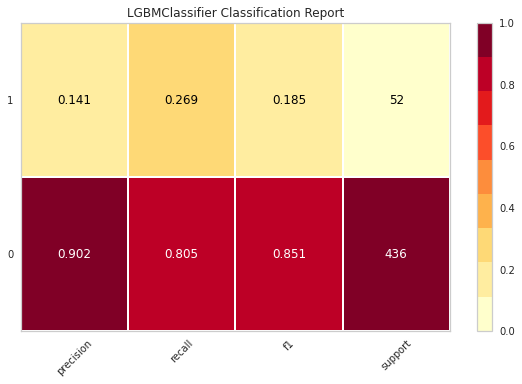

In [52]:
# Plotting the classification report
plot_model(estimator = tuned_lightgbm, plot = 'class_report')

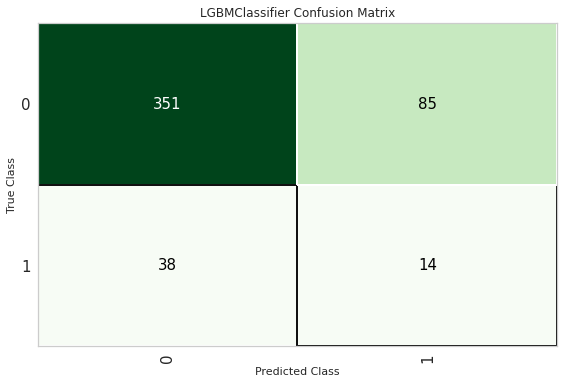

In [53]:
# Plotting the confusion matrix
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')

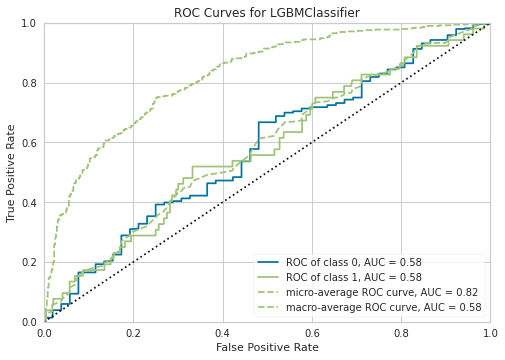

In [54]:
# Plotting the AUC
plot_model(estimator = tuned_lightgbm, plot = 'auc')

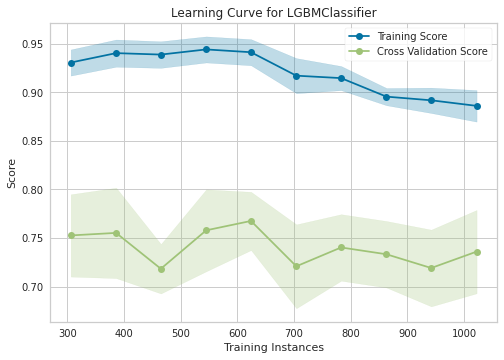

In [55]:
# Plotting the learning curve
plot_model(estimator = tuned_lightgbm, plot = 'learning' )

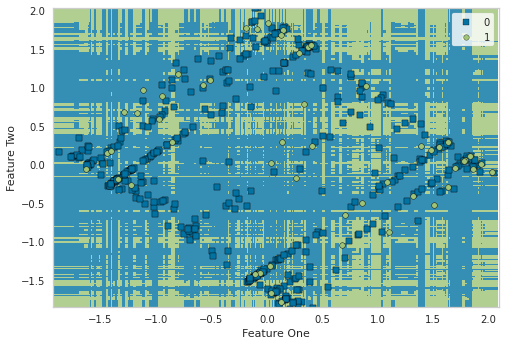

In [56]:
plot_model(estimator = tuned_lightgbm, plot='boundary')

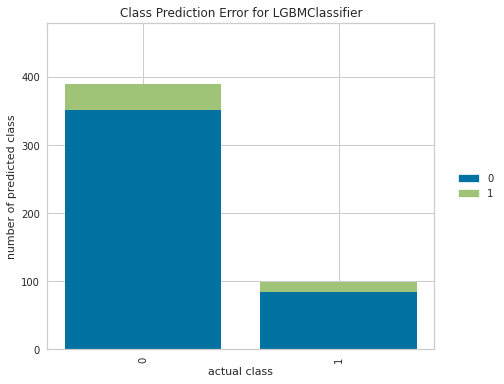

In [57]:
plot_model(estimator = tuned_lightgbm, plot = 'error')

In [58]:
evaluate_model(estimator = tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## K Neighbors Classifier

In [91]:
# Best ML analysis
knn = create_model(estimator = 'knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7193,0.4306,0.0833,0.0455,0.0588,-0.0896,-0.0953
1,0.7105,0.4248,0.1667,0.0800,0.1081,-0.0398,-0.0436
2,0.7982,0.5049,0.1667,0.1333,0.1481,0.0353,0.0356
3,0.8070,0.5784,0.3333,0.2222,0.2667,0.1606,0.1650
4,0.7719,0.5462,0.2500,0.1500,0.1875,0.0644,0.0672
5,0.7807,0.5826,0.2308,0.1667,0.1935,0.0705,0.0717
6,0.6726,0.4612,0.0833,0.0370,0.0513,-0.1123,-0.1258
7,0.7876,0.4711,0.2500,0.1667,0.2000,0.0832,0.0854
8,0.7257,0.4950,0.2500,0.1200,0.1622,0.0218,0.0239
9,0.7699,0.5239,0.1667,0.1111,0.1333,0.0068,0.0069


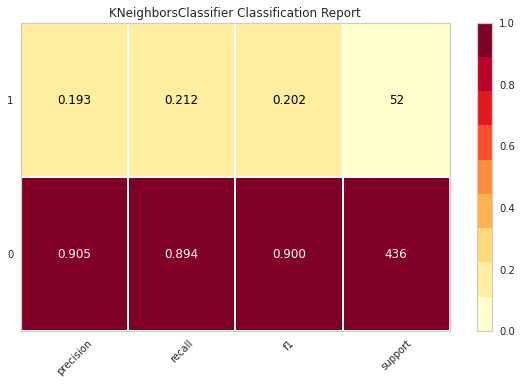

In [92]:
# Plotting the classification report
plot_model(estimator = knn, plot = 'class_report')

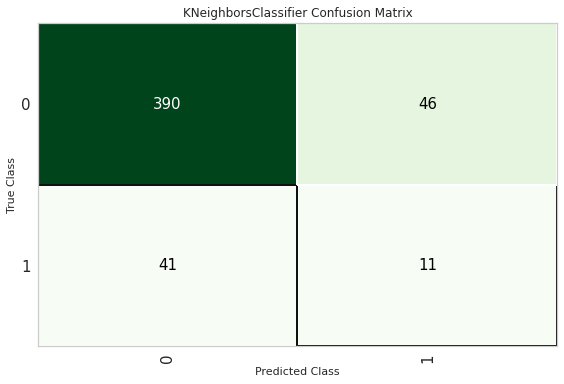

In [93]:
# Plotting the confusion matrix
plot_model(estimator = knn, plot = 'confusion_matrix')

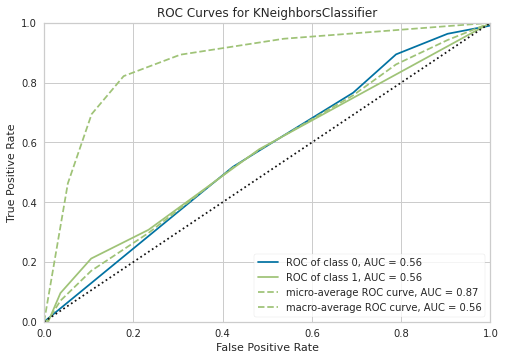

In [94]:
# Plotting the AUC
plot_model(estimator = knn, plot = 'auc')

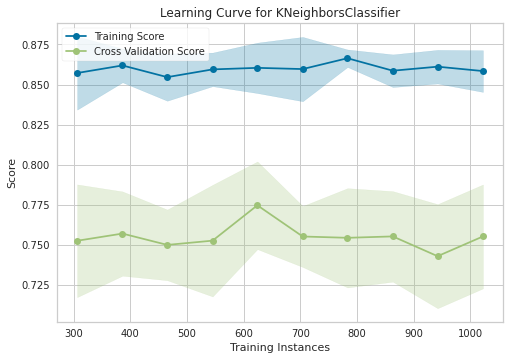

In [95]:
# Plotting the learning curve
plot_model(estimator = knn, plot = 'learning' )

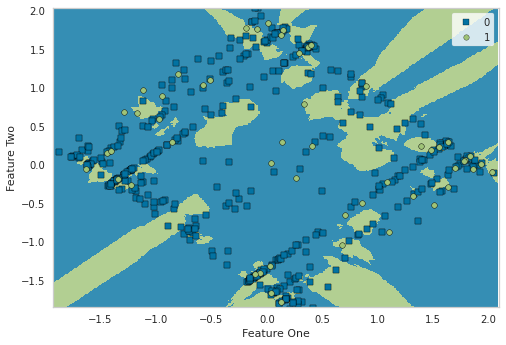

In [96]:
plot_model(estimator = knn, plot='boundary')

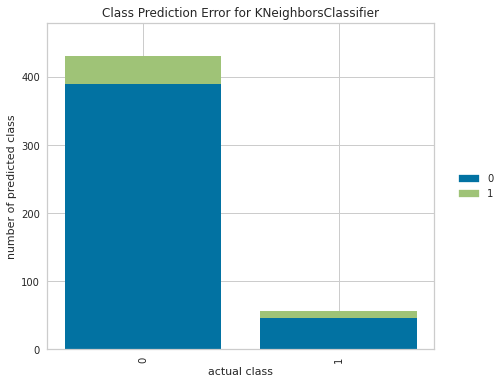

In [97]:
plot_model(estimator = knn, plot = 'error')

In [98]:
evaluate_model(estimator = knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: knn

In [99]:
# tune hyperparameters to optimize AUC
tuned_knn = tune_model(knn, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7632,0.4587,0.1667,0.1053,0.1290,0.0000,0.0000
1,0.6754,0.4326,0.2500,0.0968,0.1395,-0.0144,-0.0169
2,0.8246,0.5351,0.0833,0.1000,0.0909,-0.0053,-0.0053
3,0.7895,0.5886,0.3333,0.2000,0.2500,0.1364,0.1424
4,0.7544,0.4698,0.2500,0.1364,0.1765,0.0466,0.0496
5,0.7544,0.5552,0.3077,0.1739,0.2222,0.0896,0.0947
6,0.7080,0.4402,0.2500,0.1111,0.1538,0.0080,0.0089
7,0.7168,0.4035,0.0833,0.0455,0.0588,-0.0911,-0.0969
8,0.7168,0.5202,0.3333,0.1429,0.2000,0.0603,0.0683
9,0.7876,0.4579,0.0833,0.0714,0.0769,-0.0423,-0.0424


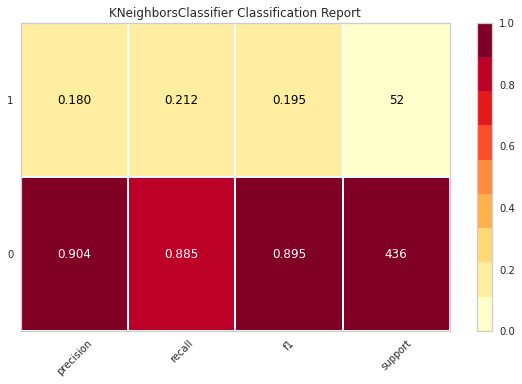

In [100]:
# Plotting the classification report
plot_model(estimator = tuned_knn, plot = 'class_report')

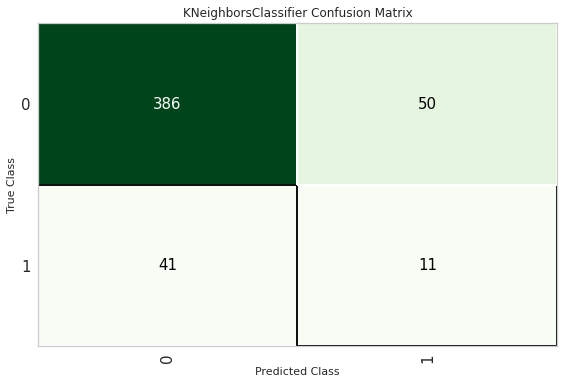

In [101]:
# Plotting the confusion matrix
plot_model(estimator = tuned_knn, plot = 'confusion_matrix')

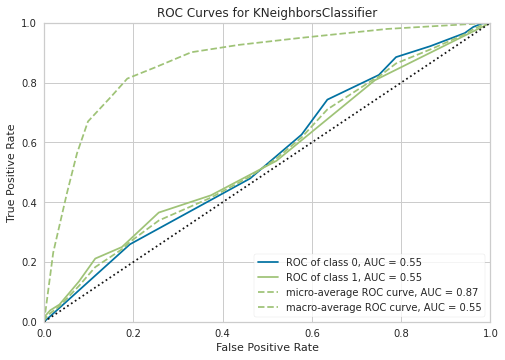

In [102]:
# Plotting the AUC
plot_model(estimator = tuned_knn, plot = 'auc')

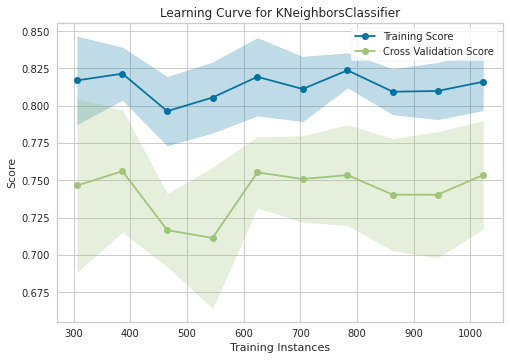

In [103]:
# Plotting the learning curve
plot_model(estimator = tuned_knn, plot = 'learning' )

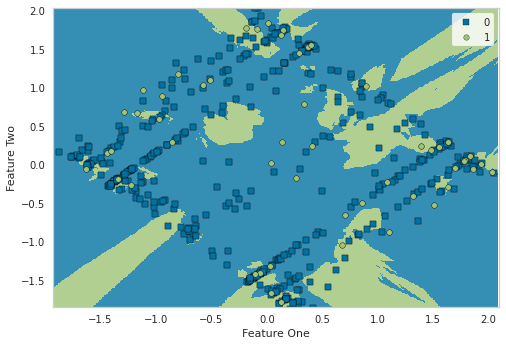

In [104]:
plot_model(estimator = tuned_knn, plot='boundary')

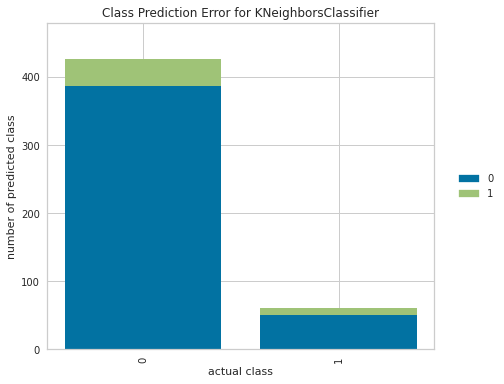

In [105]:
plot_model(estimator = tuned_knn, plot = 'error')

In [106]:
evaluate_model(estimator = tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Finalizing model

In [110]:
# finalize a model
final_tuned_lightgbm = finalize_model(tuned_lightgbm)

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

In [111]:
# save a model
save_model(final_tuned_lightgbm, base_dir + 'models/tuned_lightgbm_jupyter')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['Title_title',
                                                        'Review_content',
                                                        'Title_Dominant_Topic',
                                                        'Title_Perc_Dominant_Topic',
                                                        'Review_Dominant_Topic',
                                                        'Review_Perc_Dominant_Topic'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='sentiment_rating',
                                       time...
                                 boosting_type='gb

## Loading model

In [112]:
# Loading the saved model
tuned_lightgbm_model = load_model(base_dir + 'models/tuned_lightgbm_jupyter')
tuned_lightgbm_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['Title_title',
                                                       'Review_content',
                                                       'Title_Dominant_Topic',
                                                       'Title_Perc_Dominant_Topic',
                                                       'Review_Dominant_Topic',
                                                       'Review_Perc_Dominant_Topic'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='sentiment_rating',
                                      time...
                                boosting_type='gbdt', class_weigh